In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [1]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
        
    return poly_dataframe

In [5]:
sales = pd.read_csv('kc_house_data.csv')
sales = sales.sort_values(['sqft_living','price'])

In [6]:
poly1_data = sales['sqft_living']

In [10]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
my_features = poly15_data.columns
poly15_data['price'] = sales['price']
model15 = LinearRegression()
model15.fit(poly15_data[my_features], poly15_data['price'])
print (model15.intercept_, model15.coef_)

537116.329638 [  4.56404164e-91   6.91713566e-51  -5.84669081e-56   0.00000000e+00
   0.00000000e+00   2.68575170e-71   2.26147568e-67   1.85900299e-63
   1.47144116e-59   1.09771012e-55   7.43509038e-52   4.23015578e-48
   1.61618577e-44  -2.49283826e-48   9.59718336e-53]


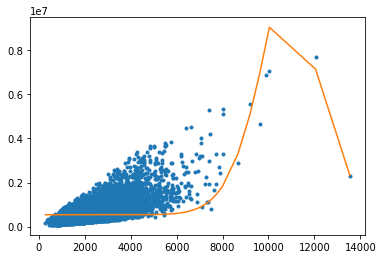

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
poly15_data['power_1'], model15.predict(poly15_data[my_features]),'-')

In [17]:
def plot_15degree(set):
    poly15_data = polynomial_dataframe(set['sqft_living'], 15)
    my_features = poly15_data.columns
    poly15_data['price'] = set['price']
    model15 = LinearRegression()
    model15.fit(poly15_data[my_features], poly15_data['price'])
    print (model15.intercept_, model15.coef_) #use print vs. return since return can only apply to function
    plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
             poly15_data['power_1'], model15.predict(poly15_data[my_features]),'-')

In [39]:
# prove the overfitting in 4 ramdom sample 
set_1 = sales.sample(frac=0.25)
set_1 = set_1.sort_values(['sqft_living','price'])
set_2 = sales.sample(frac=0.25)
set_2 = set_1.sort_values(['sqft_living','price'])
set_3 = sales.sample(frac=0.25)
set_3 = set_1.sort_values(['sqft_living','price'])
set_4 = sales.sample(frac=0.25)
set_4 = set_1.sort_values(['sqft_living','price'])

497409.52326 [  1.19328843e-76  -4.46916201e-39  -4.52968197e-45   2.14929195e-49
   0.00000000e+00   0.00000000e+00   1.12482370e-54   4.32200588e-51
   1.53793921e-47   4.84748294e-44   1.23640493e-40   1.99207252e-37
  -8.32454336e-41   1.15719475e-44  -5.34761752e-49]


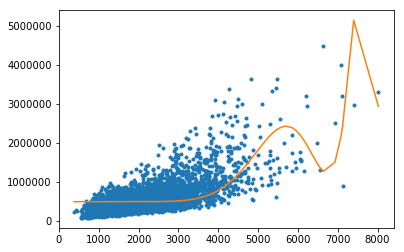

In [24]:
plot_15degree(set_1)

533306.754925 [  5.23523419e-89  -1.66907342e-49   8.46847621e-55   0.00000000e+00
   0.00000000e+00   1.05006082e-69   7.04987996e-66   4.63331682e-62
   2.94273822e-58   1.76906745e-54   9.70140077e-51   4.49124726e-47
   1.40349099e-43  -2.52859141e-47   1.13227830e-51]


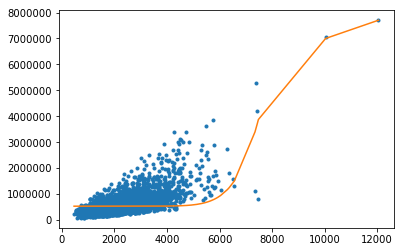

In [26]:
plot_15degree(set_2)

533306.754925 [  5.23523419e-89  -1.66907342e-49   8.46847621e-55   0.00000000e+00
   0.00000000e+00   1.05006082e-69   7.04987996e-66   4.63331682e-62
   2.94273822e-58   1.76906745e-54   9.70140077e-51   4.49124726e-47
   1.40349099e-43  -2.52859141e-47   1.13227830e-51]


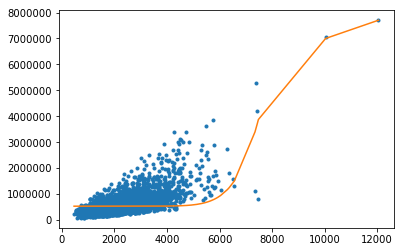

In [27]:
plot_15degree(set_3)

533306.754925 [  5.23523419e-89  -1.66907342e-49   8.46847621e-55   0.00000000e+00
   0.00000000e+00   1.05006082e-69   7.04987996e-66   4.63331682e-62
   2.94273822e-58   1.76906745e-54   9.70140077e-51   4.49124726e-47
   1.40349099e-43  -2.52859141e-47   1.13227830e-51]


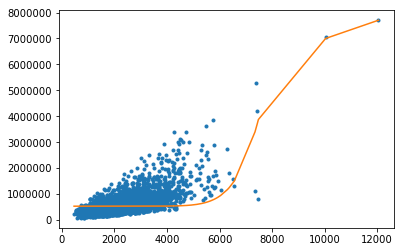

In [28]:
plot_15degree(set_4)

# Ridge Regression 


In [31]:
l2_small_penalty = 1e-5
poly15_data = polynomial_dataframe(sales['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model =Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [32]:
print (model.intercept_, model.coef_)

194587.105845 [  1.74425503e+02  -7.83644074e-02   3.73280427e-05  -2.85554311e-09
  -2.37487557e-13   9.70529709e-18   1.77791834e-21   9.76993158e-26
   7.78897289e-31  -3.83833667e-34  -4.52940095e-38  -3.16694117e-42
  -1.24102475e-46   4.53456467e-51   1.63425896e-54]


In [35]:
def plot_15degree_ridge(set):
    poly15_data = polynomial_dataframe(set['sqft_living'], 15)
    my_features = poly15_data.columns
    poly15_data['price'] = set['price']
    model15 =Ridge(alpha=l2_small_penalty, normalize=True)
    model15.fit(poly15_data[my_features], poly15_data['price'])
    print (pd.Series(model15.coef_,index=my_features)) #use print vs. return since return can only apply to function
    plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
             poly15_data['power_1'], model15.predict(poly15_data[my_features]),'-')


power_1     1.900830e+02
power_2    -7.949151e-02
power_3     3.216200e-05
power_4    -1.351919e-09
power_5    -2.497004e-13
power_6    -4.185907e-18
power_7     9.732028e-22
power_8     1.106790e-25
power_9     6.678361e-30
power_10    2.044759e-34
power_11   -8.146299e-39
power_12   -1.890182e-42
power_13   -1.815972e-46
power_14   -1.208669e-50
power_15   -4.765510e-55
dtype: float64


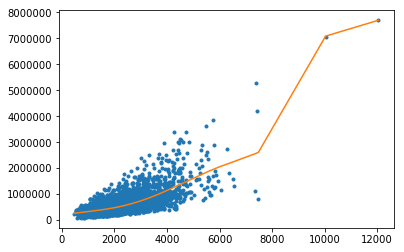

In [36]:
plot_15degree_ridge(set_1)

power_1     2.240636e+02
power_2    -1.015277e-01
power_3     3.776040e-05
power_4    -1.908187e-09
power_5    -2.431265e-13
power_6    -3.510772e-18
power_7     8.337426e-22
power_8     9.834709e-26
power_9     6.968462e-30
power_10    3.593611e-34
power_11    1.099128e-38
power_12   -3.654133e-43
power_13   -1.056027e-46
power_14   -1.268647e-50
power_15   -1.227063e-54
dtype: float64


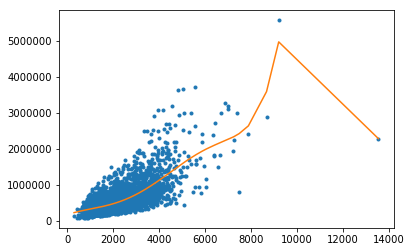

In [41]:
plot_15degree_ridge(set_2)

# Selecting an L2 penalty via cross-validation 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

train_valid, test = train_test_split(sales, test_size=.1, random_state = 1)
print (train_valid.shape)
print (test.shape)

(19451, 21)
(2162, 21)


In [52]:
poly_data = polynomial_dataframe(train_valid['sqft_living'], 15)
my_features = poly_data.columns
poly_data['price'] = train_valid['price']

ridge = Ridge(normalize=True)
alphas = np.logspace(1, 7, 13)

L2 = list()
scores = list()
scores_std = list()

for alpha in alphas:
    ridge.alpha = alpha
    this_scores = cross_val_score(ridge, poly_data[my_features], poly_data['price'], cv=10, n_jobs=1)
    scores.append(np.mean(this_scores))
    L2.append(alpha)
    scores_std.append(np.std(this_scores))

In [49]:
scores

[0.15458697967735402,
 0.070532944737664138,
 0.03075426164548466,
 0.011030561695367713,
 0.0034215233980947612,
 0.00084360634589339953,
 9.9191746913751429e-06,
 -0.00025560744930802626,
 -0.00033976490999106936,
 -0.0003663969375970355,
 -0.00037482063579479251,
 -0.00037748463426279244,
 -0.00037832708366898339]

In [50]:
scores_std

[0.16668397776144633,
 0.051409814761942722,
 0.0048455370999822773,
 0.0040090917403586852,
 0.0018627964073426085,
 0.0009014429689605249,
 0.00064053140986403525,
 0.00058320305577963386,
 0.00056930586407322864,
 0.00056539906789309475,
 0.00056421442109236969,
 0.00056384494392037869,
 0.00056372862102678392]

In [53]:
 L2

[10.0,
 31.622776601683793,
 100.0,
 316.22776601683796,
 1000.0,
 3162.2776601683795,
 10000.0,
 31622.776601683792,
 100000.0,
 316227.76601683791,
 1000000.0,
 3162277.6601683795,
 10000000.0]